# Linear Regression on a Single Variable

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math

In [2]:
def GenerateData(length, high, low):
    uniformX = np.random.uniform(high=high,low=low,size=(length))
    uniformY = np.random.randint(100)*np.random.rand()*uniformX + np.random.randint(100)*np.random.rand()
    noisyY = uniformY + high*np.random.normal(size=(length))
    return uniformX, noisyY

In [3]:
def test_train_split(x, y, percent=0.75):
    xtrain = np.array([])
    xtest = np.array([])
    ytrain = np.array([])
    ytest = np.array([])
    choice = np.random.uniform(size=(len(x)))
    for i in range(len(x)):
        if choice[i] < percent:
            xtrain = np.append(xtrain,x[i])
            ytrain = np.append(ytrain,y[i])
        else :
            xtest = np.append(xtest,x[i])
            ytest = np.append(ytest,y[i])
    return xtest, ytest, xtrain, ytrain

In [16]:
class LinearRegression:
    def __init__(self,reg=0,penalty=-18):
        self.degree = reg
        self.lmd = math.e**penalty
        self.param = np.random.randint(0,100,size=(2))
        
    def train(self,x, y, learning_rate=0.00001, max_iter=100):
        for it in range(max_iter):
            y_pred = self.predict(x)
            reg_term = self.regular_term()
            self.param[0] = self.param[0] - ((np.sum(y_pred-y))*(1/len(x)) + reg_term[0])*learning_rate
            self.param[1] = self.param[1] - (np.sum((y_pred-y)*x)*(1/len(x)) + reg_term[1])*learning_rate
          
    def regular_term(self):
        if self.degree == 0:    
            return np.array([0,0])
        elif self.degree == 1:
            return np.array([self.lmd,self.lmd])
        else :
            mag = math.sqrt(self.param[0]**2 + self.param[1]**2)
            return abs(self.param)*self.lmd/mag

    def predict(self,x):
        return (self.param[1]*x)+self.param[0]

In [37]:
def SME(y_pred,y_true):
    return np.sum((y_pred-y_true)**2)/len(y_pred)

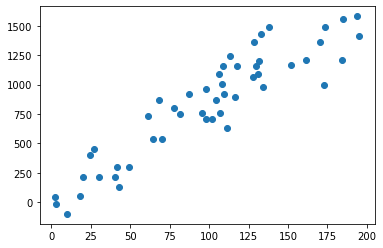

In [32]:
x, y = GenerateData(50,200,1)

plt.scatter(x,y)
plt.show()

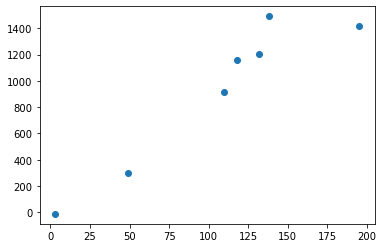

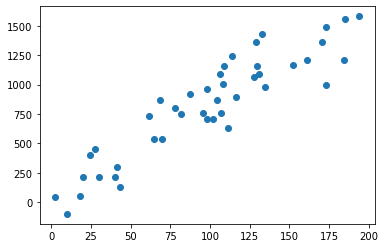

In [33]:
test_x, test_y, train_x,train_y = test_train_split(x,y,0.8)

plt.scatter(test_x,test_y)
plt.show()

plt.scatter(train_x, train_y)
plt.show()

[15  8]


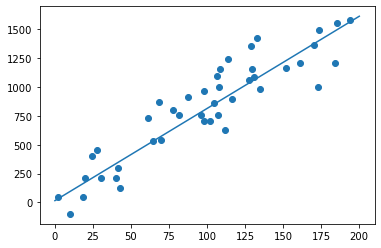

Mean Squared Error:  34468.09598879421


In [54]:
lr = LinearRegression()
lr.train(train_x,train_y)

print(lr.param)

tmpx = np.linspace(0,200,200)
plt.plot(tmpx, tmpx*lr.param[1] + lr.param[0])
plt.scatter(train_x,train_y)
plt.show()

y_pred = lr.predict(test_x)
print("Mean Squared Error: ", SME(y_pred,test_y))

# Regularization

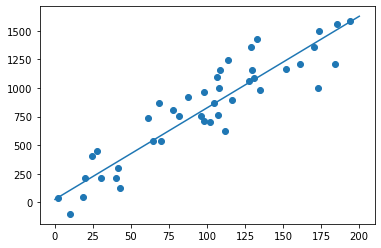

Mean Squared Error:  33169.094099466194


In [46]:
lr1 = LinearRegression(reg = 1) # LL1 regularization
lr1.train(train_x,train_y)

tmpx = np.linspace(0,200,200)
plt.plot(tmpx, tmpx*lr1.param[1] + lr1.param[0])
plt.scatter(train_x,train_y)
plt.show()

y_pred1 = lr1.predict(test_x)
print("Mean Squared Error: ", SME(y_pred1,test_y))

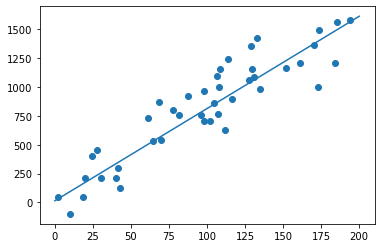

Mean Squared Error:  34589.346146238204


In [48]:
lr2 = LinearRegression(reg = 2) # LL2 regularization
lr2.train(train_x,train_y)

tmpx = np.linspace(0,200,200)
plt.plot(tmpx, tmpx*lr2.param[1] + lr2.param[0])
plt.scatter(train_x,train_y)
plt.show()

y_pred2 = lr2.predict(test_x)
print("Mean Squared Error: ", SME(y_pred2,test_y))